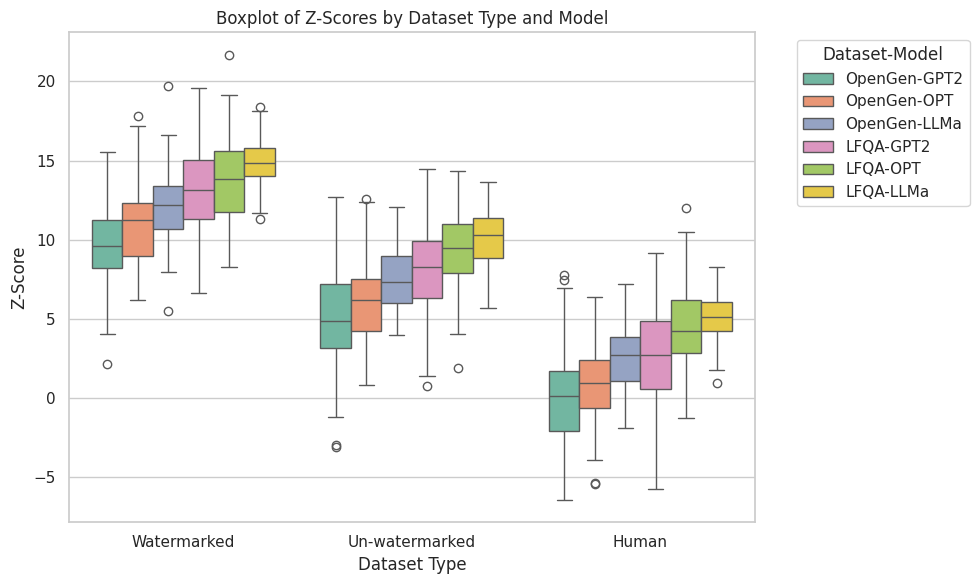

In [ ]:

# Fixing the data structure by ensuring proper formatting for the boxplot
# Flattening the data into a list of categories, models, and z-scores

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        category_list.extend([category] * 100)
        model_list.extend([model] * 100)
        zscore_list.extend(data[category][model])

# Construct a DataFrame with the corrected format
df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# Set up the plot again
plt.figure(figsize=(10, 6))

# Create the boxplot
import seaborn as sns
sns.set(style="whitegrid")

# Create the boxplot with corrected data structure
ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette="Set2", showfliers=True
)

# Customizing the plot (axis labels, title, and legend)
ax.set_xlabel("Dataset Type")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Model", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:
# Reconstructing the dataset so it works correctly with the boxplot
# We will use the melted format where each category-model combination corresponds to its z-score.

# Creating a proper format by melting the original dictionary into a long-form DataFrame
category_model = []
z_scores = []
categories = ['Watermarked', 'Un-watermarked', 'Human']
models = ["OpenGen-GPT2", "OpenGen-OPT", "OpenGen-LLMa", "LFQA-GPT2", "LFQA-OPT", "LFQA-LLMa"]

for category in categories:
    for model in models:
        category_model.extend([f"{category}-{model}"] * 100)
        z_scores.extend(data[category][model])

# Create the DataFrame again using the correct structure
df_long = pd.DataFrame({
    'Category-Model': category_model,
    'Z-Score': z_scores
})

# Create the plot now
plt.figure(figsize=(10, 6))

# Create the boxplot with the corrected data
ax = sns.boxplot(
    x="Category-Model", y="Z-Score", data=df_long,
    palette="Set2", showfliers=True
)

# Customizing the plot (axis labels, title, and legend)
ax.set_xlabel("Dataset Type - Model")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_2200582/2685074988.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


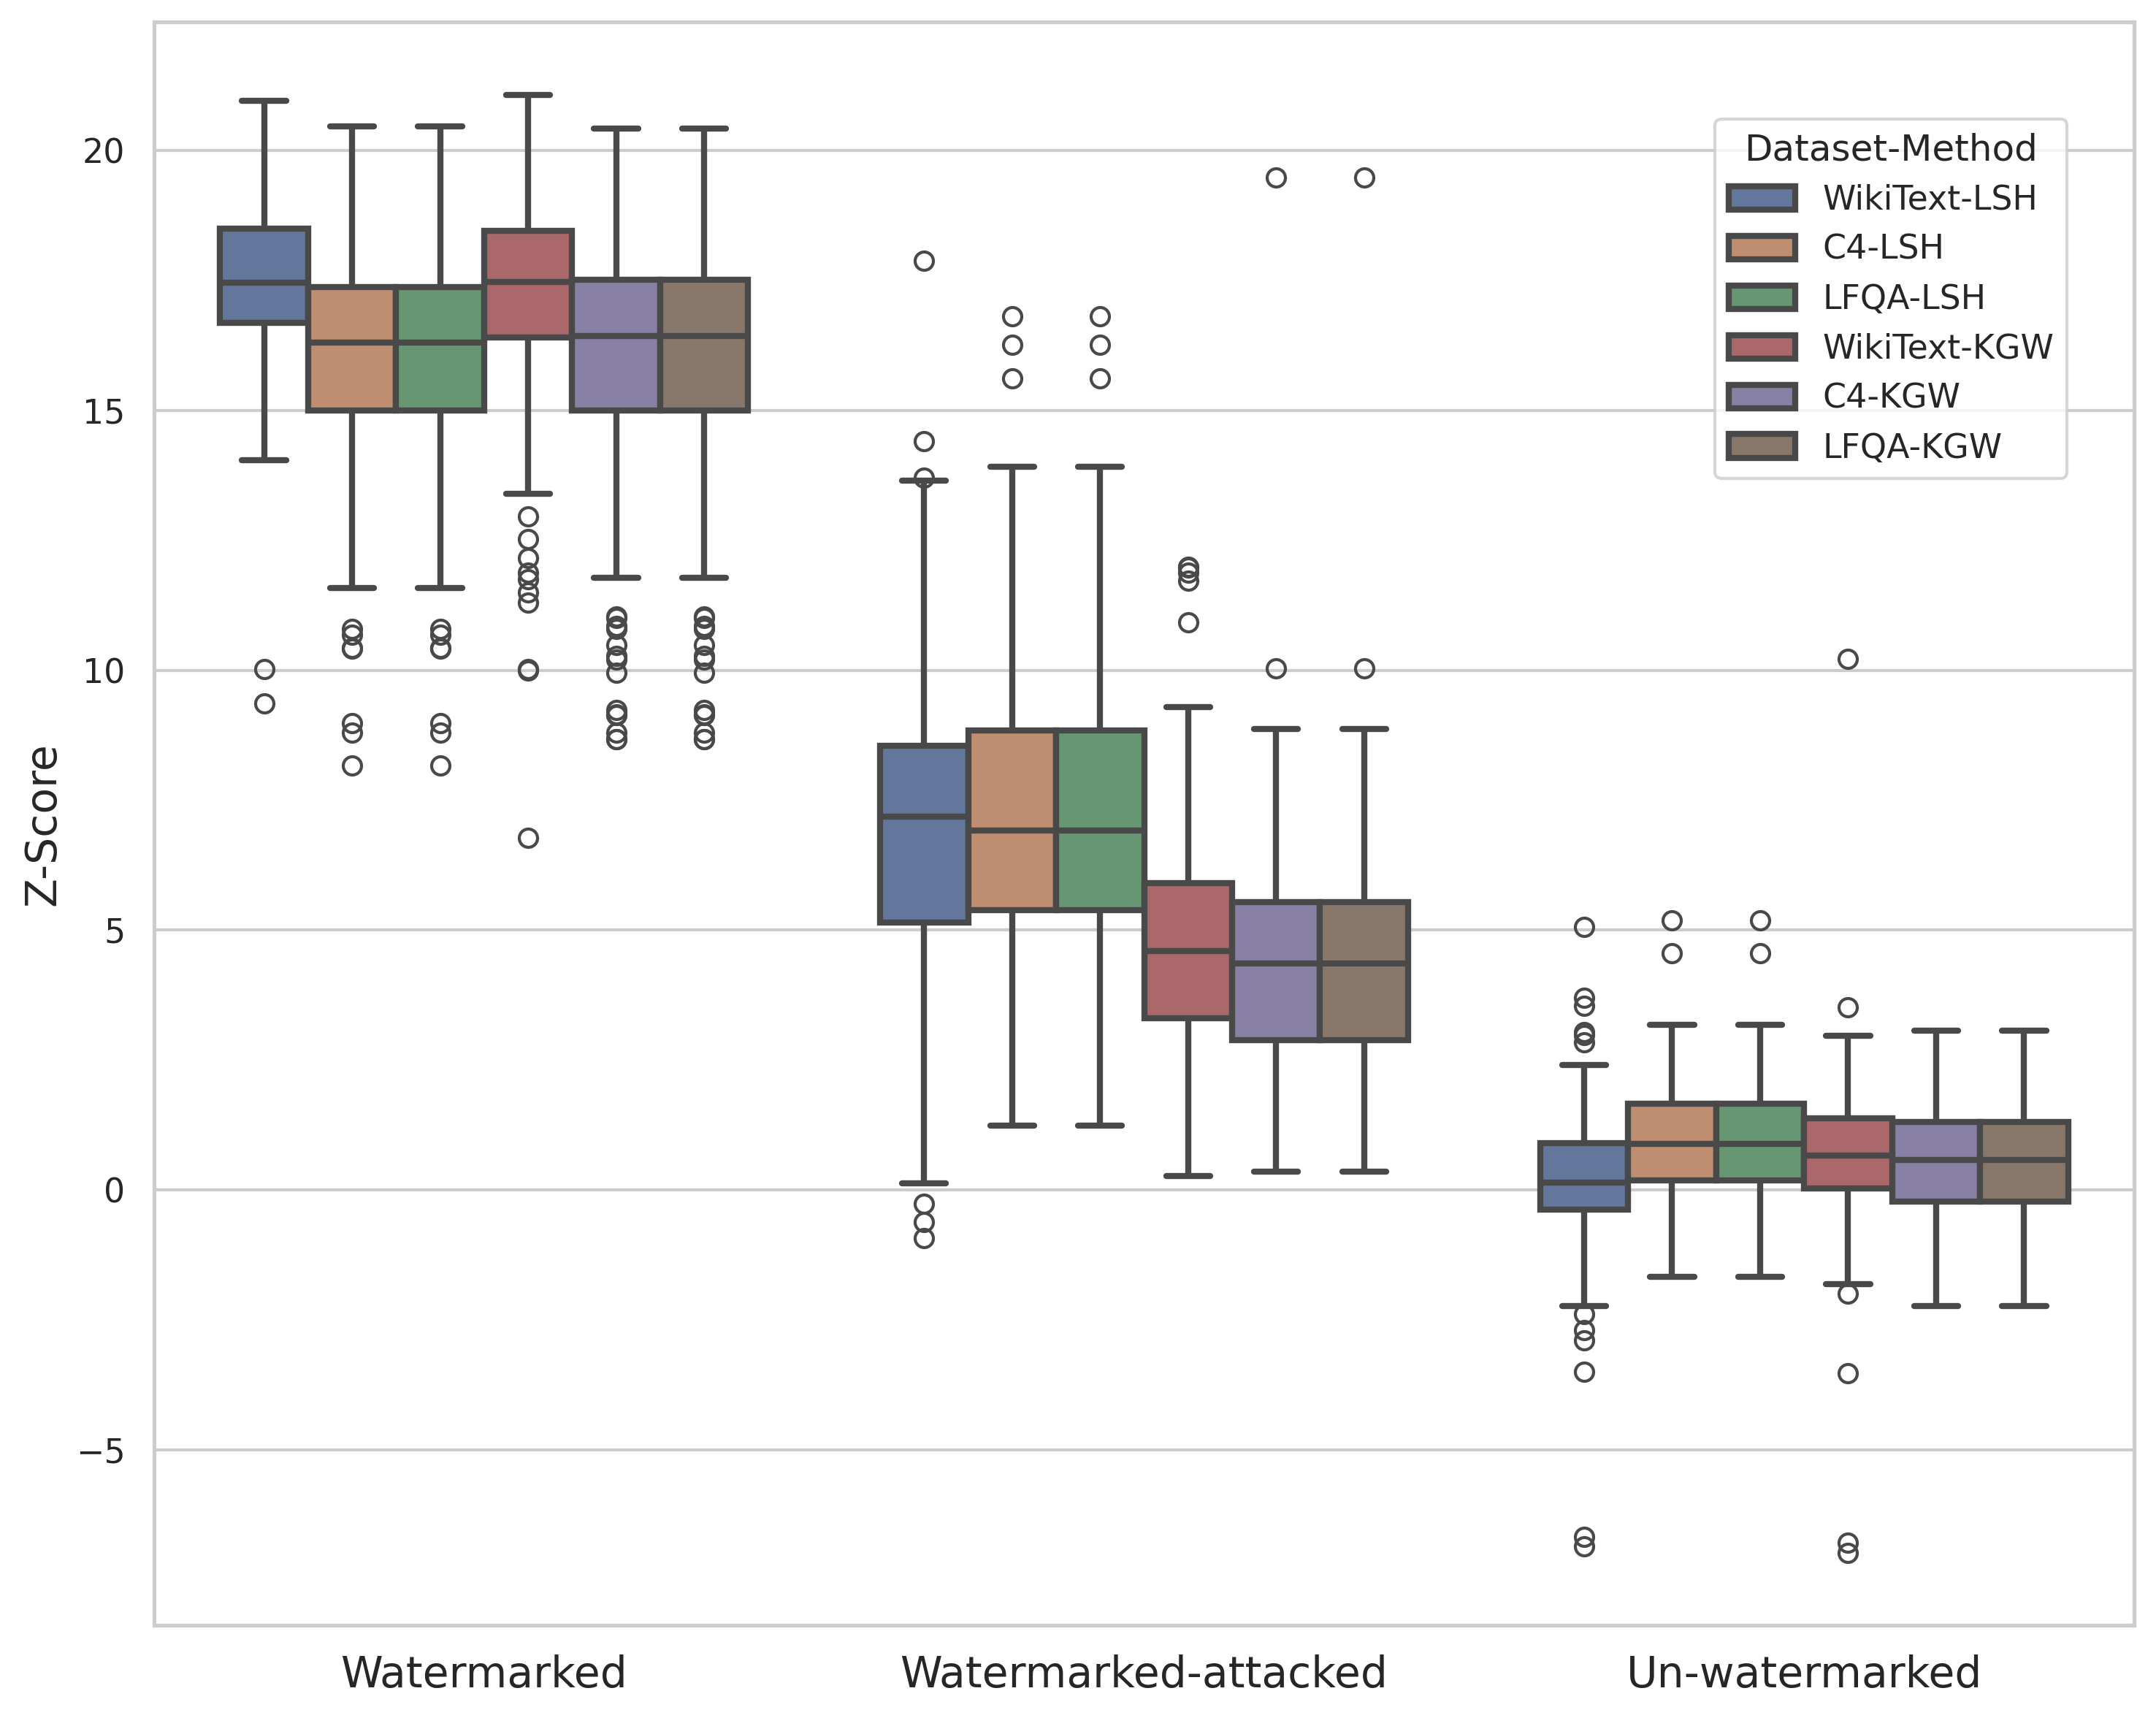

In [54]:
################################################
# Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH", "C4-LSH", "LFQA-LSH", "WikiText-KGW", "C4-KGW", "LFQA-KGW"]


# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_z_score']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_z_score']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8),dpi=300)

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
################################################
# PPL Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['Watermarked', 'Watermarked-attacked', 'Un-watermarked']
models = ["WikiText-LSH", "C4-LSH", "LFQA-LSH", "WikiText-KGW", "C4-KGW", "LFQA-KGW"]



import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "C4_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_LSH": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "C4_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score",
    "LFQA_KGW": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}
    
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_z_score']),
    },
    "Watermarked-attacked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['w_wm_output_attacked_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['w_wm_output_attacked_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['w_wm_output_attacked_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['w_wm_output_attacked_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['w_wm_output_attacked_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['w_wm_output_attacked_z_score']),
    },
    "Un-watermarked": {
        "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
        "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
        "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
        "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
        "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
        "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8),dpi=300)

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

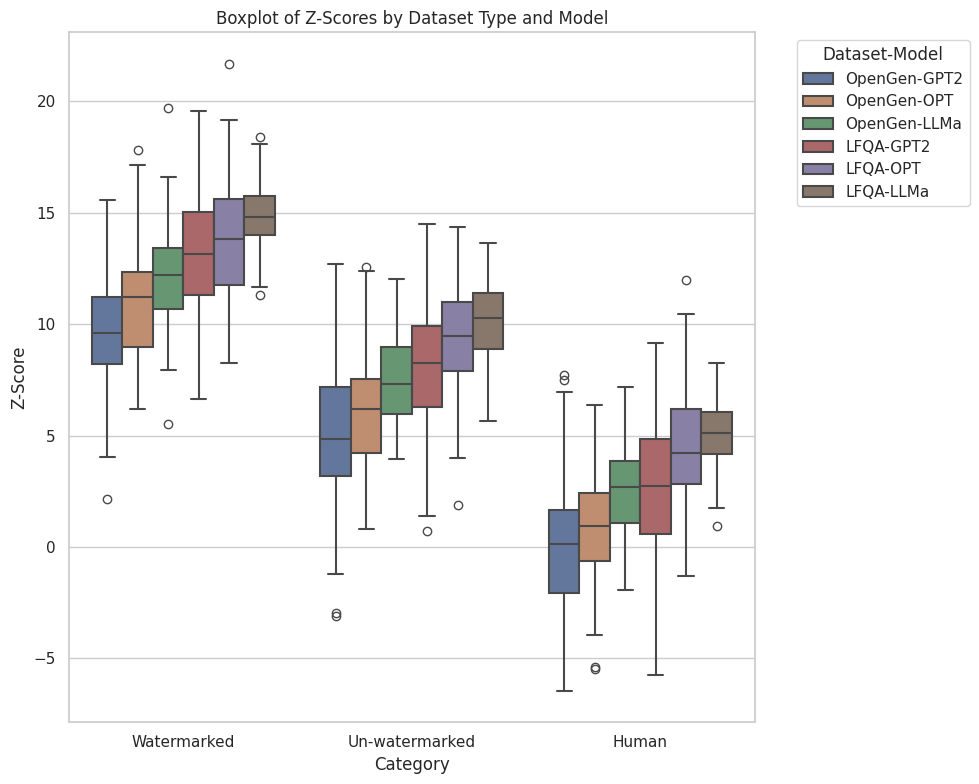

In [21]:
################################################
# 测试用的随机生成的模版
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

# Simulating z-scores for 5 models under 3 conditions (Watermarked, Un-watermarked, Human)
data = {
    "Watermarked": {
        "OpenGen-GPT2": np.random.normal(10, 3, 100),
        "OpenGen-OPT": np.random.normal(11, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(12, 2, 100),
        "LFQA-GPT2": np.random.normal(13, 3, 100),
        "LFQA-OPT": np.random.normal(14, 2.5, 100),
        "LFQA-LLMa": np.random.normal(15, 1.5, 100),
    },
    "Un-watermarked": {
        "OpenGen-GPT2": np.random.normal(5, 3, 100),
        "OpenGen-OPT": np.random.normal(6, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(7, 2, 100),
        "LFQA-GPT2": np.random.normal(8, 3, 100),
        "LFQA-OPT": np.random.normal(9, 2.5, 100),
        "LFQA-LLMa": np.random.normal(10, 1.5, 100),
    },
    "Human": {
        "OpenGen-GPT2": np.random.normal(0, 3, 100),
        "OpenGen-OPT": np.random.normal(1, 2.5, 100),
        "OpenGen-LLMa": np.random.normal(2, 2, 100),
        "LFQA-GPT2": np.random.normal(3, 3, 100),
        "LFQA-OPT": np.random.normal(4, 2.5, 100),
        "LFQA-LLMa": np.random.normal(5, 1.5, 100),
    }
}

# Convert to a DataFrame format that fits the boxplot
data_combined = []
categories = list(data.keys())
models = list(data["Watermarked"].keys())

# Fixing the data structure by ensuring proper formatting for the boxplot
# Flattening the data into a list of categories, models, and z-scores

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        category_list.extend([category] * 100)
        model_list.extend([model] * 100)
        zscore_list.extend(data[category][model])

# Construct a DataFrame with the corrected format
df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# Set up the plot again
plt.figure(figsize=(10, 8))

# Create the boxplot
import seaborn as sns
sns.set(style="whitegrid")

# Create the boxplot with corrected data structure
# ax = sns.boxplot(
#     x="Category", y="Z-Score", hue="Model", data=df_corrected,
#     palette="Set2", showfliers=True
# )
ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True,linewidth=1.5 
)

# Customizing the plot (axis labels, title, and legend)
# ax.set_xlabel("Dataset Type")
ax.set_ylabel("Z-Score")
ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Model", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


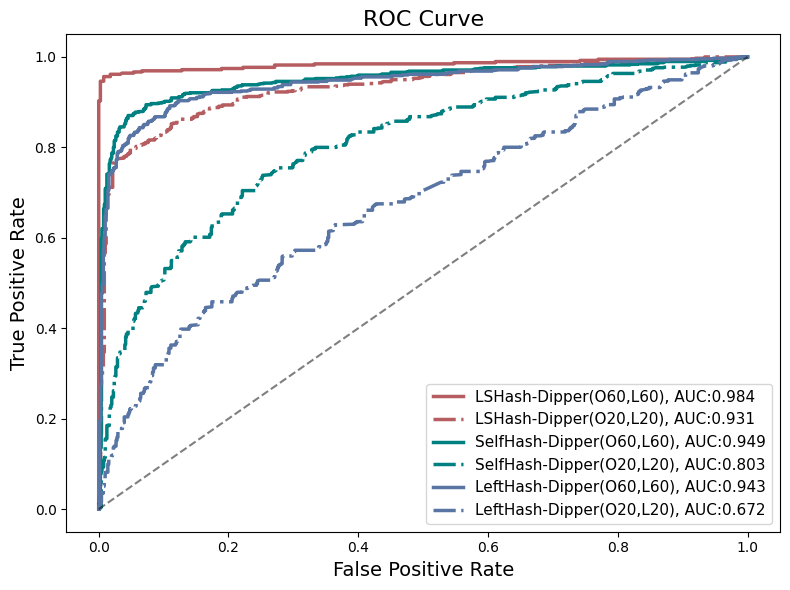

In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import math

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# 加载 z-scores
def load_z_scores(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))

    # Assuming 'w_wm_output_z_score' and 'no_wm_output_z_score' are the relevant keys
    human_z_scores = [entry.get('no_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_unattacked = [entry.get('w_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_01 = [entry.get('w_wm_output_attacked_z_score', math.nan) for entry in data]  # Example for epsilon=0.1
    return human_z_scores, machine_z_scores_unattacked, machine_z_scores_01

# 清理数据，去除 NaN 值
def clean_z_scores(human_z, machine_z):
    valid_human_z = [z for z in human_z if not np.isnan(z)]
    valid_machine_z = [z for z in machine_z if not np.isnan(z)]
    
    min_len = min(len(valid_human_z), len(valid_machine_z))
    return valid_human_z[:min_len], valid_machine_z[:min_len]

# 计算 ROC AUC
def calculate_roc_auc(human_z, machine_z):
    # assert len(human_z) == len(machine_z)

    all_scores = np.concatenate([np.array(human_z), np.array(machine_z)])
    
    baseline_labels = np.zeros_like(human_z)
    watermark_labels = np.ones_like(machine_z)
    all_labels = np.concatenate([baseline_labels, watermark_labels])

    fpr, tpr, _ = roc_curve(all_labels, all_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc


# 可视化ROC曲线
def plot_roc_curve():
    ########################################################################################################
    # lsh dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制 ROC 曲线
    plt.figure(figsize=(8, 6))
    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,label=f'LSHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # lsh dipper 20
    data_path =  "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,linestyle='-.', label=f'LSHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # kwg dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal', linewidth=2.5,label=f'SelfHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal',linewidth=2.5,linestyle='-.', label=f'SelfHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_dipper_O60_L60.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5, label=f'LeftHash-Dipper(O60,L60), AUC:{auc_01:.3f}')
    
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_dipper_O20_L20.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5, linestyle='-.',label=f'LeftHash-Dipper(O20,L20), AUC:{auc_01:.3f}')
    ########################################################################################################
    # 绘制基准线
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.5)
    # 设置坐标轴标签和标题
    plt.xlabel('False Positive Rate', fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel('True Positive Rate', fontsize=14)   # 设置y轴标签字体大小
    plt.title('ROC Curve', fontsize=16)              # 设置图表标题字体大小

    # 添加图例
    plt.legend(loc='lower right', fontsize=11, markerscale=2)  # 放大图例中的标记


    # 显示图形
    plt.tight_layout()
    plt.show()

# 调用可视化函数
plot_roc_curve()


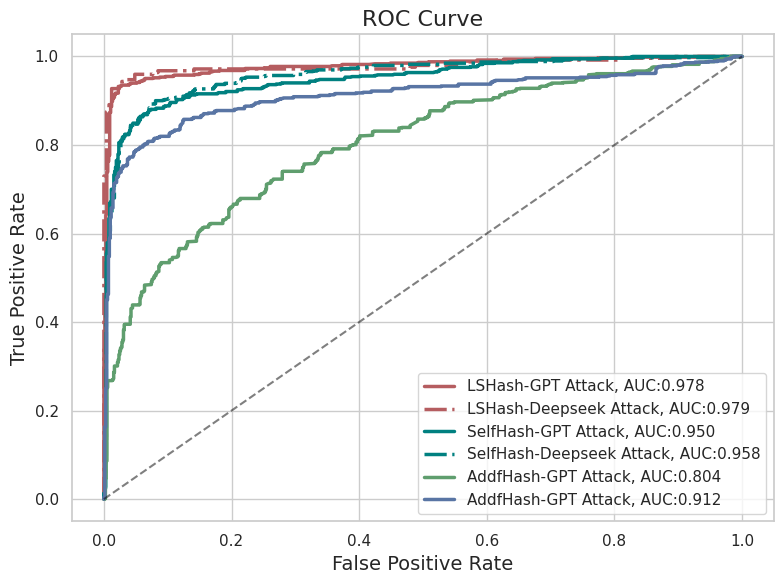

In [56]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import math

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

def load_z_scores(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))

    # Assuming 'w_wm_output_z_score' and 'no_wm_output_z_score' are the relevant keys
    human_z_scores = [entry.get('no_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_unattacked = [entry.get('w_wm_output_z_score', math.nan) for entry in data]
    machine_z_scores_01 = [entry.get('w_wm_output_attacked_z_score', math.nan) for entry in data]  # Example for epsilon=0.1
    return human_z_scores, machine_z_scores_unattacked, machine_z_scores_01

def clean_z_scores(human_z, machine_z):
    valid_human_z = [z for z in human_z if not np.isnan(z)]
    valid_machine_z = [z for z in machine_z if not np.isnan(z)]
    
    min_len = min(len(valid_human_z), len(valid_machine_z))
    return valid_human_z[:min_len], valid_machine_z[:min_len]

def calculate_roc_auc(human_z, machine_z):
    # assert len(human_z) == len(machine_z)

    all_scores = np.concatenate([np.array(human_z), np.array(machine_z)])
    
    baseline_labels = np.zeros_like(human_z)
    watermark_labels = np.ones_like(machine_z)
    all_labels = np.concatenate([baseline_labels, watermark_labels])

    fpr, tpr, _ = roc_curve(all_labels, all_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc


def plot_roc_curve():
    ########################################################################################################
    # lsh dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制 ROC 曲线
    plt.figure(figsize=(8, 6))
    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,label=f'LSHash-GPT Attack, AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # lsh dipper 20
    data_path =  "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    # 绘制不同的曲线
    # plt.plot(fpr_unattacked, tpr_unattacked, color='lightgreen', label=f'unattacked, AUC:{auc_unattacked:.3f}')
    plt.plot(fpr_01, tpr_01, color=colors[3], linewidth=2.5,linestyle='-.', label=f'LSHash-Deepseek Attack, AUC:{auc_01:.3f}')
    # plt.plot(fpr_unattacked, tpr_unattacked, color='teal', label=f'un, AUC:{auc_unattacked :.3f}')
    ########################################################################################################
    # kwg dipper 60
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal', linewidth=2.5,label=f'SelfHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # kwg dipper 20
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color='teal',linewidth=2.5,linestyle='-.', label=f'SelfHash-Deepseek Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # add gpt
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_addhash_wikit/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[2],linewidth=2.5,linestyle='-', label=f'AddfHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # left gpt
    data_path = "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_lefthash/gen_table_GPT.jsonl_z_score"
    
    human_z, machine_z_unattacked, machine_z_01 = load_z_scores(data_path)

    human_z, machine_z_unattacked = clean_z_scores(human_z, machine_z_unattacked)
    human_z, machine_z_01 = clean_z_scores(human_z, machine_z_01)

    # dipper attack数据曲线
    fpr_unattacked, tpr_unattacked, auc_unattacked = calculate_roc_auc(human_z, machine_z_unattacked)
    # unattacked数据曲线
    fpr_01, tpr_01, auc_01 = calculate_roc_auc(human_z, machine_z_01)

    plt.plot(fpr_01, tpr_01, color=colors[0],linewidth=2.5,linestyle='-', label=f'AddfHash-GPT Attack, AUC:{auc_01:.3f}')
    ########################################################################################################
    # 绘制基准线
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.5)
    # 设置坐标轴标签和标题
    plt.xlabel('False Positive Rate', fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel('True Positive Rate', fontsize=14)   # 设置y轴标签字体大小
    plt.title('ROC Curve', fontsize=16)              # 设置图表标题字体大小

    # 添加图例
    plt.legend(loc='lower right', fontsize=11, markerscale=2)  # 放大图例中的标记


    # 显示图形
    plt.tight_layout()
    plt.show()

# 调用可视化函数
plot_roc_curve()

In [ ]:
################################################
# Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['WikiText-LSH', 'WikiText-SelfHash']
models = ["Wateramrked",
        "Dipper(O60,L60)",
        "Dipper(O20,L20)",
        "Deepseek Attacked",
        "GPT Attacked",
        "Unwatermarked"]

# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_LSH_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_LSH_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_LSH_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score",
    "WikiText_KGW_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_KGW_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_KGW_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score",
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}

    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "WikiText-LSH": {
        "Wateramrked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_LSH_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_LSH_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_LSH_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_LSH_GPT"]['no_wm_output_z_score']),
    },
    "WikiText-SelfHash": {
        "Wateramrked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_KGW_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_KGW_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_KGW_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_KGW_GPT"]['no_wm_output_z_score']),
    },
    # "Un-watermarked": {
    #     "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
    #     "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
    #     "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
    #     "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
    #     "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
    #     "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    # }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8))

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()

/tmp/ipykernel_2580077/2620624549.py:134: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)


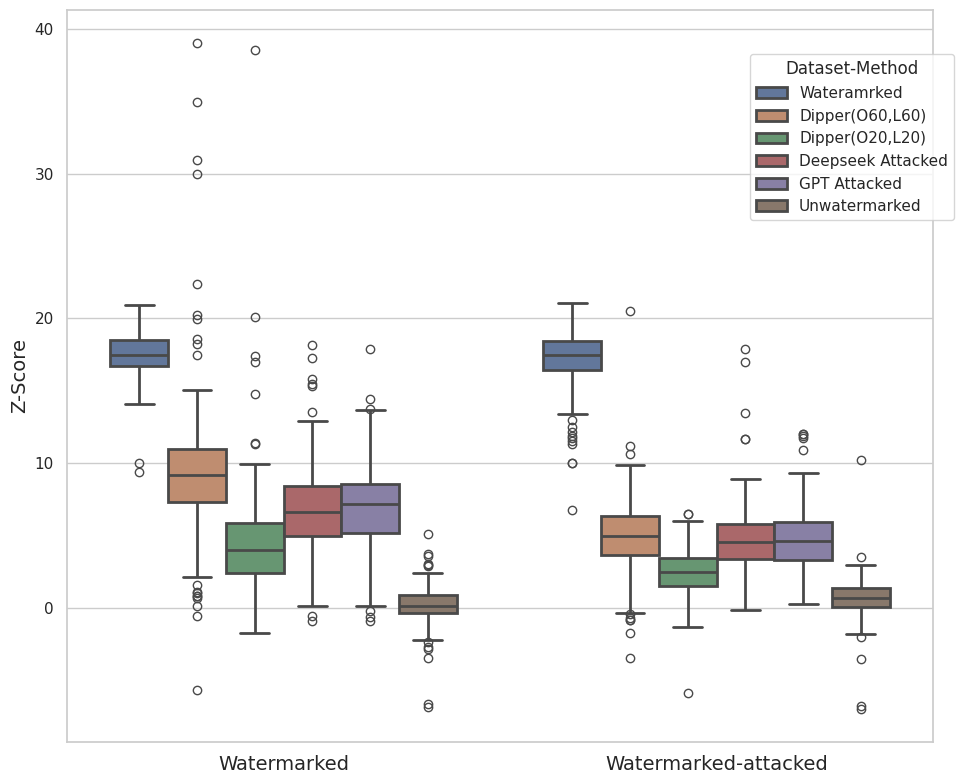

In [ ]:
################################################
# Dataset-Methord Visualization
################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = ['#5975A4','#CC8963','#5F9E6E','#B55D60','#857AAB','#8D7866']

# Generating synthetic data for the boxplot (since actual data isn't provided)
np.random.seed(42)

category_model = []
z_scores = []
categories = ['WikiText-LSH', 'WikiText-SelfHash']
models = ["Wateramrked",
        "Dipper(O60,L60)",
        "Dipper(O20,L20)",
        "Deepseek Attacked",
        "GPT Attacked",
        "Unwatermarked"]

# WikiText_LSH="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# C4_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_LSH_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score"

# WikiText_KGW="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score" 
# C4_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"
# LFQA_KGW_path="/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/delta2_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_self_wiki_c4_new/gen_table_GPT.jsonl_z_score"

import json
import numpy as np

# 路径列表
paths = {
    "WikiText_LSH_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_GPT.jsonl_z_score",
    "WikiText_LSH_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_LSH_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_LSH_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_LshParm_6_32_0.2_LSH_v2.2_c4_new/gen_table_deepseek_attacker.jsonl_z_score",
    "WikiText_KGW_GPT": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_GPT.jsonl_z_score",
    "WikiText_KGW_dipper60": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O60_L60.jsonl_z_score",
    "WikiText_KGW_dipper20": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_dipper_O20_L20.jsonl_z_score",
    "WikiText_KGW_deepseek": "/home/shenhm/documents/lm-watermarking/watermark_reliability_release/output/wikitext/delta5_len_150/llama_7B_N500_T200_no_filter_batch_1_delta_5_gamma_0.25_KWG_width_4_selfhash_wikit/gen_table_deepseek_attacker.jsonl_z_score",
}

# 用于存储数据的字典
all_data = {}

# 处理每个路径
for key, path in paths.items():
    data = {"w_wm_output_z_score": [], "w_wm_output_attacked_z_score": [], "no_wm_output_z_score": []}

    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                entry = json.loads(line.strip())
                
                if 'w_wm_output_z_score' in entry:
                    data["w_wm_output_z_score"].append(entry["w_wm_output_z_score"])
                if 'w_wm_output_attacked_z_score' in entry:
                    data["w_wm_output_attacked_z_score"].append(entry["w_wm_output_attacked_z_score"])
                if 'no_wm_output_z_score' in entry:
                    data["no_wm_output_z_score"].append(entry["no_wm_output_z_score"])
            except json.JSONDecodeError as e:
                print(f"JSON解析失败: {e}, 跳过这一行")
    
    all_data[key] = data

# 模拟 Z-Score 数据
data = {
    "Wateramrked": {
        "Wateramrked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_LSH_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_LSH_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_LSH_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_LSH_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_LSH_GPT"]['no_wm_output_z_score']),
    },
    "WikiText-SelfHash": {
        "Wateramrked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_z_score']),
        "Dipper(O60,L60)": np.array(all_data["WikiText_KGW_dipper60"]['w_wm_output_attacked_z_score']),
        "Dipper(O20,L20)": np.array(all_data["WikiText_KGW_dipper20"]['w_wm_output_attacked_z_score']),
        "Deepseek Attacked": np.array(all_data["WikiText_KGW_deepseek"]['w_wm_output_attacked_z_score']),
        "GPT Attacked": np.array(all_data["WikiText_KGW_GPT"]['w_wm_output_attacked_z_score']),
        "Unwatermarked": np.array(all_data["WikiText_KGW_GPT"]['no_wm_output_z_score']),
    },
    # "Un-watermarked": {
    #     "WikiText-LSH": np.array(all_data["WikiText_LSH"]['no_wm_output_z_score']),
    #     "C4-LSH": np.array(all_data["C4_LSH"]['no_wm_output_z_score']),
    #     "LFQA-LSH": np.array(all_data["LFQA_LSH"]['no_wm_output_z_score']),
    #     "WikiText-KGW": np.array(all_data["WikiText_KGW"]['no_wm_output_z_score']),
    #     "C4-KGW": np.array(all_data["C4_KGW"]['no_wm_output_z_score']),
    #     "LFQA-KGW": np.array(all_data["LFQA_KGW"]['no_wm_output_z_score']),
    # }
}

category_list = []
model_list = []
zscore_list = []

for category in categories:
    for model in models:
        # Check that the z-scores have the same length
        zscores = data[category][model][:200]
        # Extend the lists based on the actual data length
        category_list.extend([category] * len(zscores))
        model_list.extend([model] * len(zscores))
        zscore_list.extend(zscores)

df_corrected = pd.DataFrame({
    "Category": category_list,
    "Model": model_list,
    "Z-Score": zscore_list
})

# 设置绘图
plt.figure(figsize=(10, 8))

# 创建箱型图
import seaborn as sns
sns.set(style="whitegrid")

# 定制离群点的样式为菱形
flierprops = dict(marker='D', markersize=6, alpha=0.7)

ax = sns.boxplot(
    x="Category", y="Z-Score", hue="Model", data=df_corrected,
    palette=colors, showfliers=True, linewidth=2.0)

plt.legend(title="Dataset-Model", loc="upper right", bbox_to_anchor=(1, 0))
# 定制化图表
ax.set_ylabel('Z-Score', fontsize=14)  # 增加字体大小
ax.set_xlabel('')
ax.set_xticklabels(['Watermarked', 'Watermarked-attacked', 'Un-watermarked'], fontsize=14)
# ax.set_title("Boxplot of Z-Scores by Dataset Type and Model")
plt.legend(title="Dataset-Method", bbox_to_anchor=(0.78, 0.95), loc="upper left")

plt.tight_layout()
plt.show()